In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/database.sqlite
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv


In [2]:
df = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
df.Text.fillna("",inplace = True)

In [6]:
del df['Id']
del df['ProductId']
del df['UserId']
del df['ProfileName']
del df['HelpfulnessNumerator']
del df['HelpfulnessDenominator']
del df['Time']


In [7]:
df

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...
568449,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [8]:
df['text'] = df['Text'] + ' ' + df['Summary']
del df['Text']
del df['Summary']

In [9]:
df.head()

,Score,text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [10]:
def sentiment_rating(rating):
    
    if(int(rating) == 1 or int(rating) == 2 or int(rating) == 3):
        return 0
    else: 
        return 1
df.Score = df.Score.apply(sentiment_rating)

In [11]:
df.head()

,Score,text
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...


In [12]:
df.Score.value_counts()

1    443777
0    124677
Name: Score, dtype: int64

In [13]:
df.columns = ['Liked','Review']

In [14]:
df

,Liked,Review
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...
...,...,...
568449,1,Great for sesame chicken..this is a good if no...
568450,0,I'm disappointed with the flavor. The chocolat...
568451,1,"These stars are small, so you can give 10-15 o..."
568452,1,These are the BEST treats for training and rew...


In [15]:
X=df.Review.astype('str')
y=df.Liked

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
vocab=1000
tokenizer=Tokenizer(vocab,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)
padded_train=pad_sequences(train_sequence,maxlen=500)
padded_test=pad_sequences(test_sequence,maxlen=500)

Using TensorFlow backend.


In [18]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,GlobalAveragePooling1D
from keras.optimizers import Adam



In [19]:
model=Sequential()
model.add(Embedding(vocab,1000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 1000)        1000000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               128128    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [23]:
history = model.fit(padded_train,y_train,validation_data=(padded_test,y_test),epochs=10)

Train on 454763 samples, validate on 113691 samples
Epoch 1/10
454763/454763 [==============================] - 100s 219us/step - loss: 0.2514 - accuracy: 0.8926 - val_loss: 0.2422 - val_accuracy: 0.8966
Epoch 2/10
454763/454763 [==============================] - 99s 218us/step - loss: 0.2430 - accuracy: 0.8963 - val_loss: 0.2426 - val_accuracy: 0.8969
Epoch 3/10
454763/454763 [==============================] - 98s 216us/step - loss: 0.2369 - accuracy: 0.8994 - val_loss: 0.2364 - val_accuracy: 0.8991
Epoch 4/10
454763/454763 [==============================] - 100s 220us/step - loss: 0.2321 - accuracy: 0.9019 - val_loss: 0.2369 - val_accuracy: 0.9002
Epoch 5/10
454763/454763 [==============================] - 99s 217us/step - loss: 0.2276 - accuracy: 0.9044 - val_loss: 0.2318 - val_accuracy: 0.9038
Epoch 6/10
454763/454763 [==============================] - 98s 217us/step - loss: 0.2231 - accuracy: 0.9065 - val_loss: 0.2329 - val_accuracy: 0.9029
Epoch 7/10
454763/454763 [==============

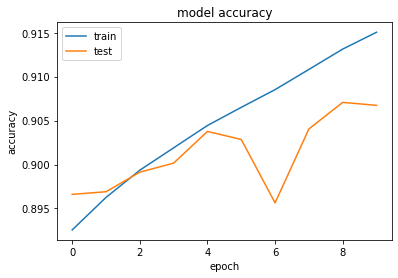

In [24]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()